In [1]:
%pip install kaggle
%pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("utkarshx27/passwords")

print("Path to dataset files:", path)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


100%|█████████████████████████████████████████████████████████████████████████████████████| 5.95k/5.95k [00:00<?, ?B/s]

Extracting files...
Path to dataset files: C:\Users\mrcch\.cache\kagglehub\datasets\utkarshx27\passwords\versions\1


In [46]:
%pip install xgboost
%pip install lightgbm 

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Styling
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
COLORS = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, 
                             auc, accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Statistical Analysis
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr

print("✅ All libraries imported successfully!")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 NumPy version: {np.__version__}")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
✅ All libraries imported successfully!
📦 Pandas version: 2.1.1
📦 NumPy version: 1.25.2


In [58]:
import os


csv_files = [f for f in os.listdir(path) if f.lower().endswith('.csv')]
if not csv_files:
    raise FileNotFoundError("❌ No CSV files found in the specified directory!")

csv_path = os.path.join(path, csv_files[0])

df = pd.read_csv(csv_path)


# Display basic information
print("="*70)
print(csv_files[0], " DATASET")
print("="*70)

print(f"🧾 Shape: {df.shape[0]:,} rows × {df.shape[1]:,} columns")
print(f"🧩 Columns: {', '.join(df.columns)}")
print("\n📋 Data Types:")
print(df.dtypes)
print("="*70)

# First look at the data
df.head(10)

passwords.csv  DATASET
🧾 Shape: 507 rows × 9 columns
🧩 Columns: rank, password, category, value, time_unit, offline_crack_sec, rank_alt, strength, font_size

📋 Data Types:
rank                 float64
password              object
category              object
value                float64
time_unit             object
offline_crack_sec    float64
rank_alt             float64
strength             float64
font_size            float64
dtype: object


,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0
5,6.0,12345,simple-alphanumeric,1.85,minutes,1.110000e-06,6.0,4.0,8.0
6,7.0,dragon,animal,3.72,days,3.210000e-03,7.0,8.0,11.0
7,8.0,baseball,sport,6.91,years,2.170000e+00,8.0,4.0,8.0
8,9.0,football,sport,6.91,years,2.170000e+00,9.0,7.0,11.0
9,10.0,letmein,password-related,3.19,months,8.350000e-02,10.0,8.0,11.0


In [59]:
print(" Basic Info")
print("="*50)
df.info()
print("="*50)

print("\n Quick Statistics")
display(df.describe(include='all').transpose())
print("="*50)

missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print("\n Missing values by column:\n")
display(missing.to_frame("Missing Count"))
print("="*50)

df.info()
df.describe(include='all').transpose().head(10)
df.head(5)

 Basic Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               500 non-null    float64
 1   password           500 non-null    object 
 2   category           500 non-null    object 
 3   value              500 non-null    float64
 4   time_unit          500 non-null    object 
 5   offline_crack_sec  500 non-null    float64
 6   rank_alt           500 non-null    float64
 7   strength           500 non-null    float64
 8   font_size          500 non-null    float64
dtypes: float64(6), object(3)
memory usage: 35.8+ KB

 Quick Statistics


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rank,500.0,NaN,NaN,NaN,250.5,144.481833,1.0,125.75,250.5,375.25,500.0
password,500,500,password,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,500,10,name,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value,500.0,NaN,NaN,NaN,5.60266,8.436005,1.29,3.43,3.72,3.72,92.27
time_unit,500,7,days,238,NaN,NaN,NaN,NaN,NaN,NaN,NaN
offline_crack_sec,500.0,NaN,NaN,NaN,0.50001,2.658132,0.0,0.00321,0.00321,0.0835,29.27
rank_alt,500.0,NaN,NaN,NaN,251.224,145.052163,1.0,125.75,251.5,376.25,502.0
strength,500.0,NaN,NaN,NaN,7.432,5.415536,0.0,6.0,7.0,8.0,48.0
font_size,500.0,NaN,NaN,NaN,10.298,3.651282,0.0,10.0,11.0,11.0,28.0



 Missing values by column:



,Missing Count
rank,7
password,7
category,7
value,7
time_unit,7
offline_crack_sec,7
rank_alt,7
strength,7
font_size,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               500 non-null    float64
 1   password           500 non-null    object 
 2   category           500 non-null    object 
 3   value              500 non-null    float64
 4   time_unit          500 non-null    object 
 5   offline_crack_sec  500 non-null    float64
 6   rank_alt           500 non-null    float64
 7   strength           500 non-null    float64
 8   font_size          500 non-null    float64
dtypes: float64(6), object(3)
memory usage: 35.8+ KB


,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0


In [66]:
df_clean = df.dropna()
df_clean = df_clean.drop(columns=['font_size'])
print(df_clean.shape)

missing = df_clean.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print("\n Missing values by column:\n")
display(missing.to_frame("Missing Count"))
print("="*50)

(500, 8)

 Missing values by column:



,Missing Count


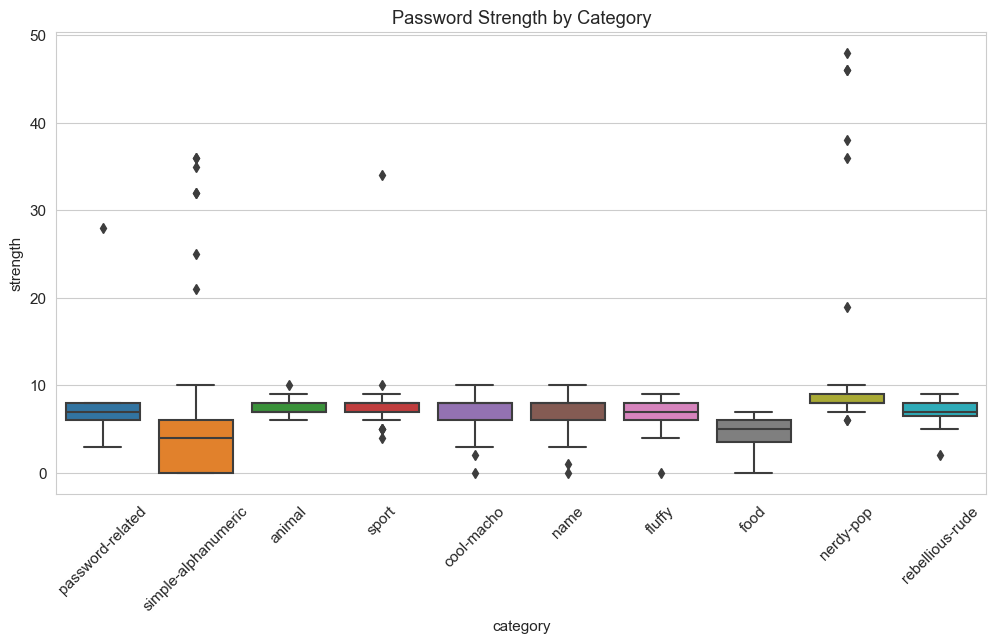

In [67]:
sns.boxplot(x='category', y='strength', data=df_clean)
plt.xticks(rotation=45)
plt.title('Password Strength by Category')
plt.show()

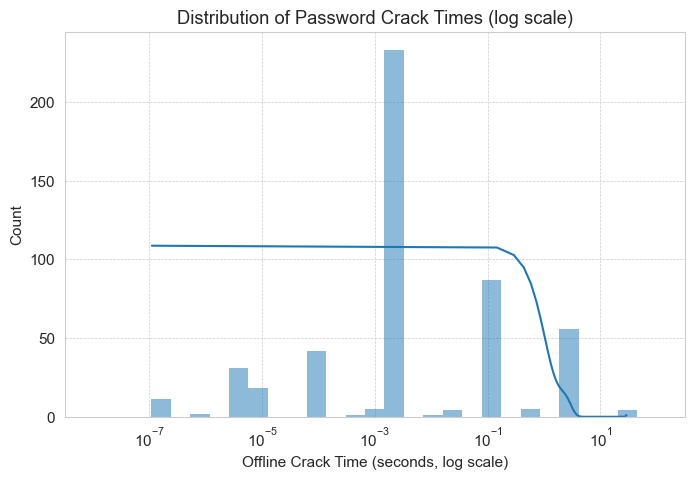

In [68]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean['offline_crack_sec'], bins=np.logspace(-8, 2, 30), kde=True)
plt.xscale('log')
plt.xlabel("Offline Crack Time (seconds, log scale)")
plt.ylabel("Count")
plt.title("Distribution of Password Crack Times (log scale)")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

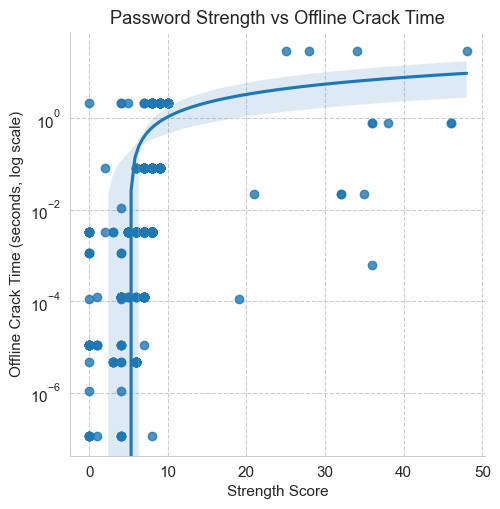

In [69]:
sns.lmplot(x='strength', y='offline_crack_sec', data=df_clean)
plt.yscale('log')
plt.title("Password Strength vs Offline Crack Time")
plt.xlabel("Strength Score")
plt.ylabel("Offline Crack Time (seconds, log scale)")
plt.grid(True, which='both', ls='--')
plt.show()

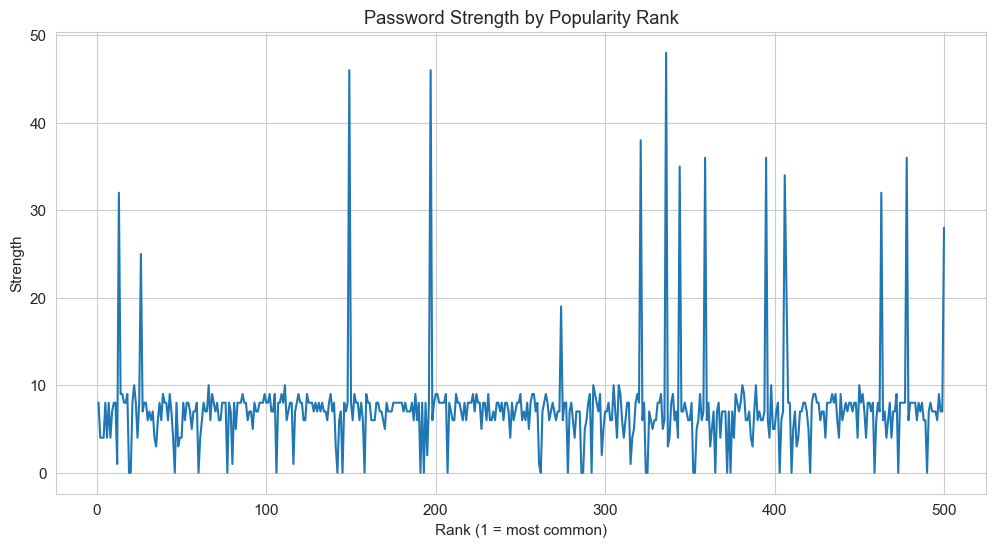

In [70]:
sns.lineplot(x='rank', y='strength', data=df_clean)
plt.title("Password Strength by Popularity Rank")
plt.xlabel("Rank (1 = most common)")
plt.ylabel("Strength")
plt.show()

In [71]:
df_clean['length'] = df_clean['password'].str.len()
df_clean['has_upper'] = df_clean['password'].str.contains(r'[A-Z]').astype(int)
df_clean['has_lower'] = df_clean['password'].str.contains(r'[a-z]').astype(int)
df_clean['has_digit'] = df_clean['password'].str.contains(r'\d').astype(int)
df_clean['has_symbol'] = df_clean['password'].str.contains(r'[^A-Za-z0-9]').astype(int)
df_clean['num_digits'] = df_clean['password'].str.count(r'\d')
df_clean['num_symbols'] = df_clean['password'].str.count(r'[^A-Za-z0-9]')

print('Columns: ', df_clean.columns)

Columns:  Index(['rank', 'password', 'category', 'value', 'time_unit',
       'offline_crack_sec', 'rank_alt', 'strength', 'length', 'has_upper',
       'has_lower', 'has_digit', 'has_symbol', 'num_digits', 'num_symbols'],
      dtype='object')


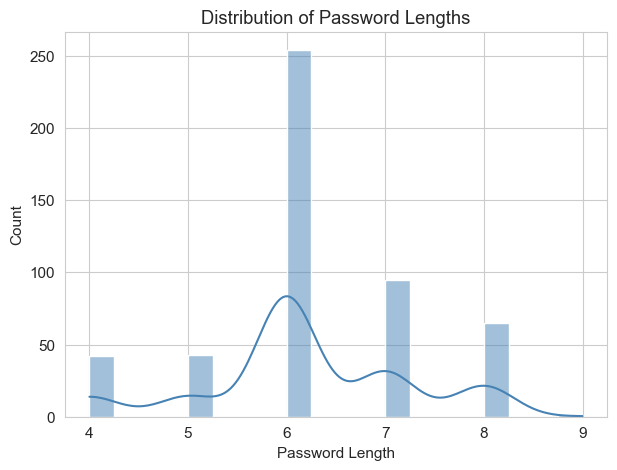

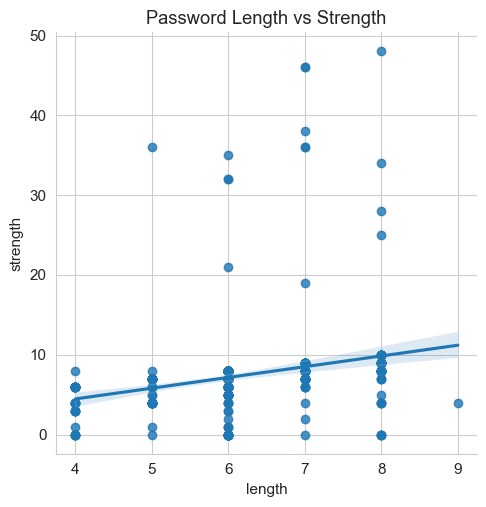

In [72]:
plt.figure(figsize=(7,5))
sns.histplot(df_clean['length'], bins=20, kde=True, color='steelblue')
plt.title("Distribution of Password Lengths")
plt.xlabel("Password Length")
plt.ylabel("Count")
plt.show()

sns.lmplot(x='length', y='strength', data=df_clean)
plt.title("Password Length vs Strength")
plt.show()

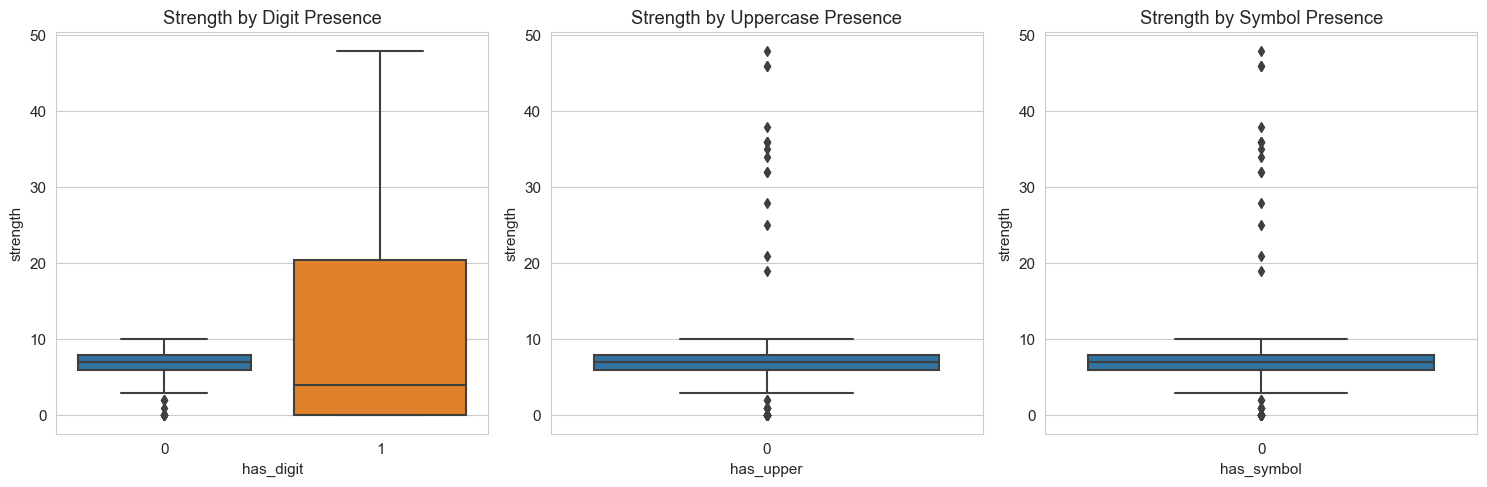

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

sns.boxplot(x='has_digit', y='strength', data=df_clean, ax=axes[0])
axes[0].set_title("Strength by Digit Presence")

sns.boxplot(x='has_upper', y='strength', data=df_clean, ax=axes[1])
axes[1].set_title("Strength by Uppercase Presence")

sns.boxplot(x='has_symbol', y='strength', data=df_clean, ax=axes[2])
axes[2].set_title("Strength by Symbol Presence")

plt.tight_layout()
plt.show()

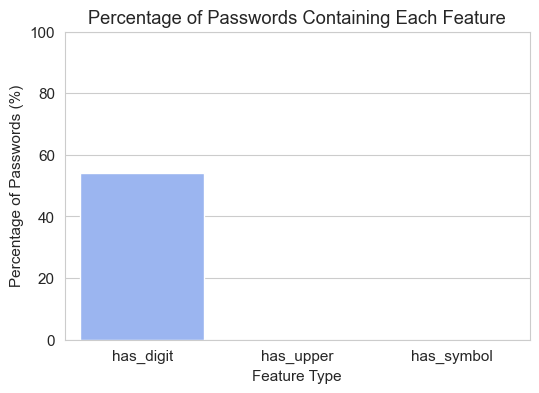

In [75]:
df_clean[['has_upper', 'has_digit', 'has_symbol']].sum() / len(df_clean) * 100

feature_presence = (
    df_clean[['has_upper', 'has_digit', 'has_symbol']]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
sns.barplot(x=feature_presence.index, y=feature_presence.values, palette="coolwarm")
plt.title("Percentage of Passwords Containing Each Feature")
plt.ylabel("Percentage of Passwords (%)")
plt.xlabel("Feature Type")
plt.ylim(0, 100)
plt.show()

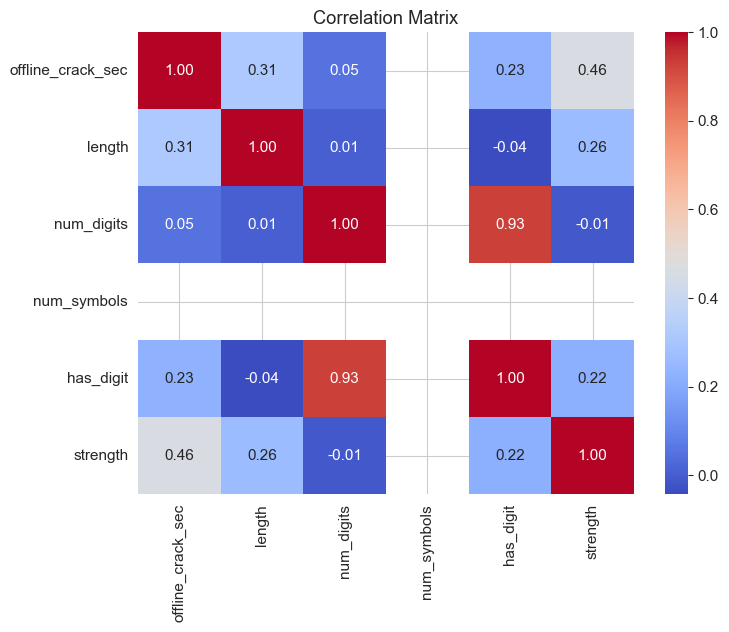

In [76]:
corr = df_clean[['offline_crack_sec', 'length', 'num_digits', 'num_symbols','has_digit', 'strength']].corr()
plt.figure(figsize=[8,6])
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

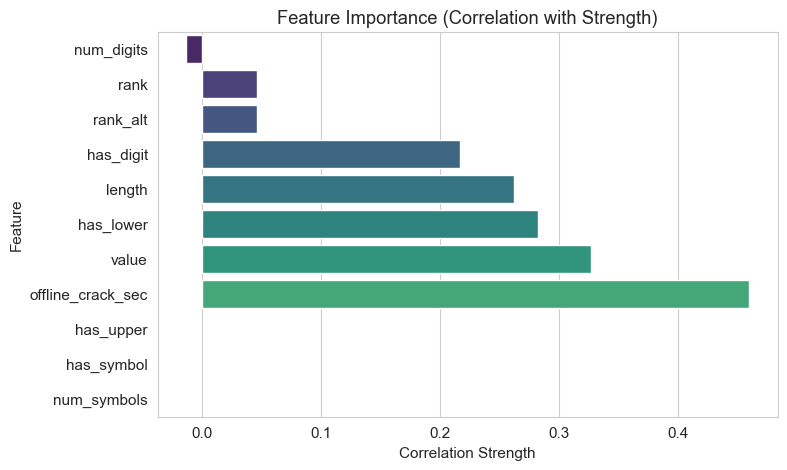

In [80]:
corr_with_target = (
    df_clean.corr(numeric_only=True)['strength']
    .drop('strength')
    .sort_values(ascending=True)
)



plt.figure(figsize=(8,5))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="viridis")
plt.title("Feature Importance (Correlation with Strength)")
plt.xlabel("Correlation Strength")
plt.ylabel("Feature")
plt.show()

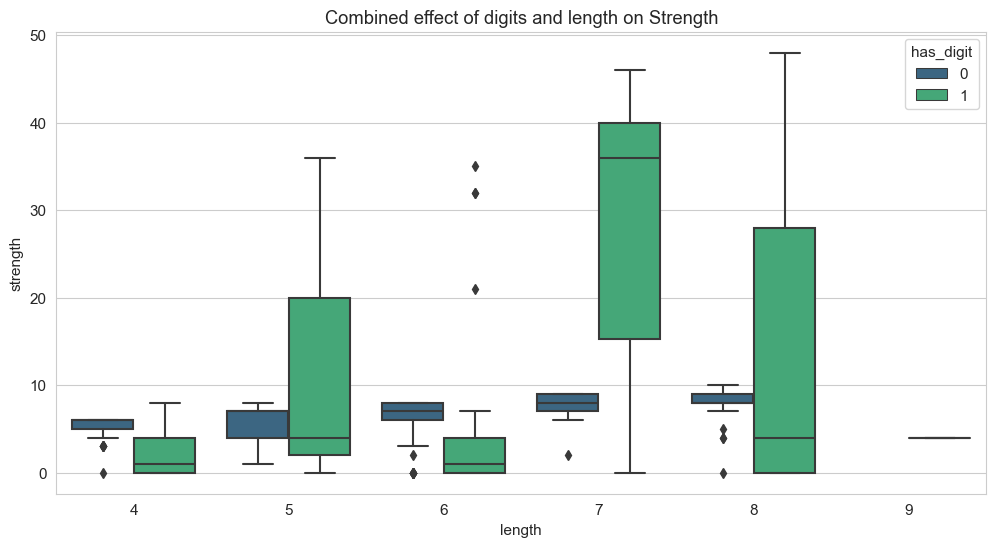

In [79]:
sns.boxplot(
    x='length', y='strength',
    hue='has_digit', data=df_clean,
    palette='viridis'
)
plt.title('Combined effect of digits and length on Strength')
plt.show()

In [84]:
X = df_clean[['rank', 'length', 'num_digits', 'has_digit', 'has_lower']]
y = df_clean['strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_

for name, imp in sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True):
    print(f"{name:15s}: {imp:.3f}")
    
print('='*70)
y_pred = model.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

has_lower      : 0.301
has_digit      : 0.262
num_digits     : 0.255
rank           : 0.138
length         : 0.043
R² Score: 0.882
MAE: 1.44


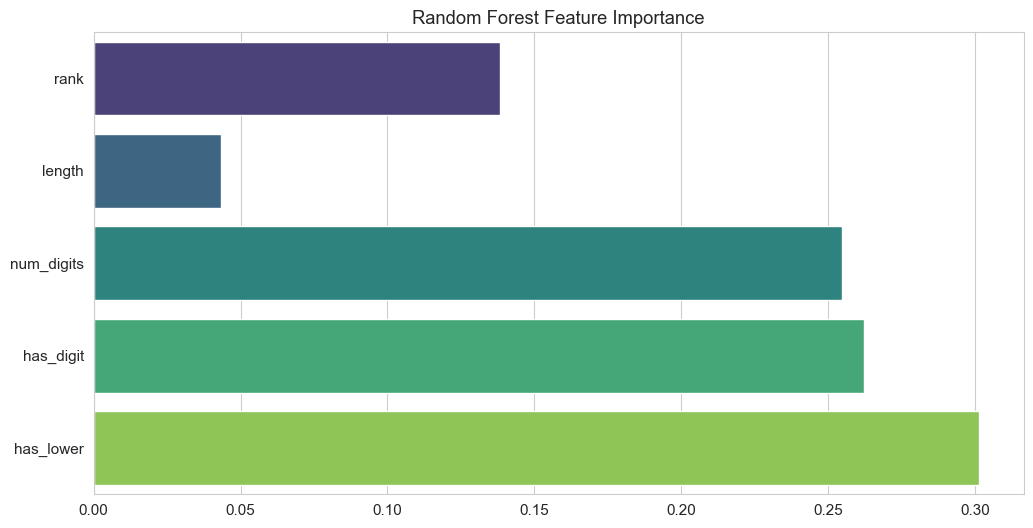

In [85]:
sns.barplot(x=model.feature_importances_, y=X.columns, orient='h', palette='viridis')
plt.title("Random Forest Feature Importance")
plt.show()

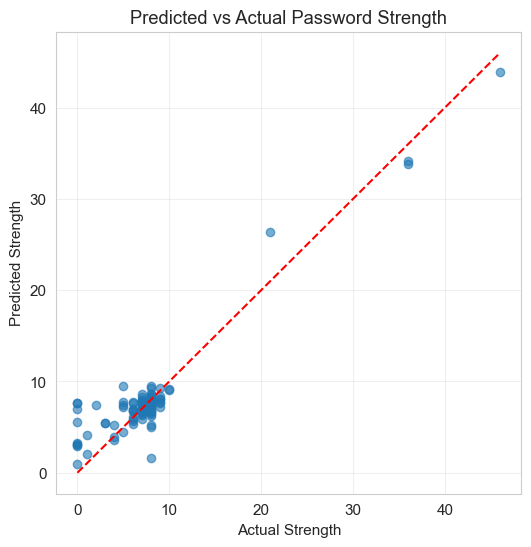

In [86]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Predicted vs Actual Password Strength")
plt.grid(True, alpha=0.3)
plt.show()

In [88]:
X = df_clean[['length', 'num_digits', 'has_digit', 'has_lower']]
y = df_clean['strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_

for name, imp in sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True):
    print(f"{name:15s}: {imp:.3f}")
    
print('='*70)
y_pred = model.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

has_lower      : 0.341
num_digits     : 0.334
has_digit      : 0.265
length         : 0.059
R² Score: 0.920
MAE: 1.25


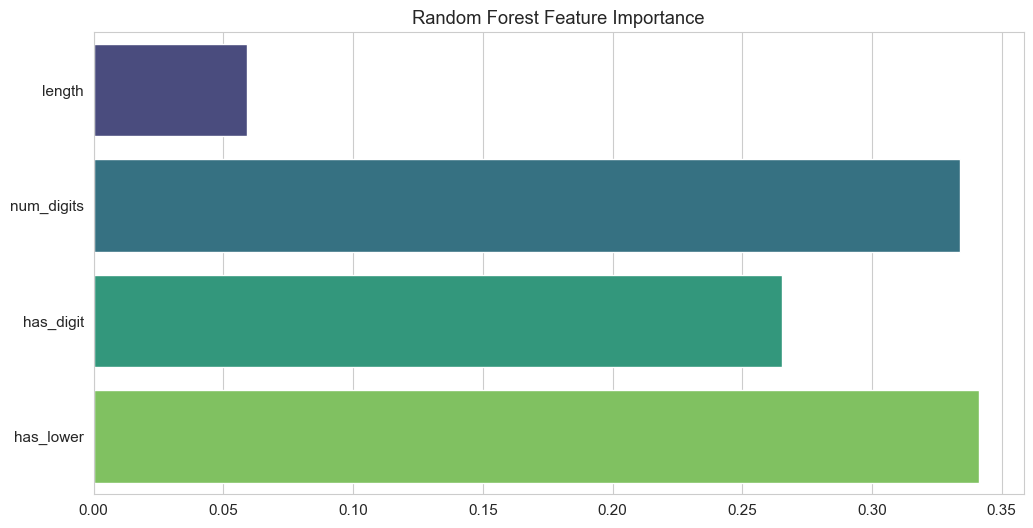

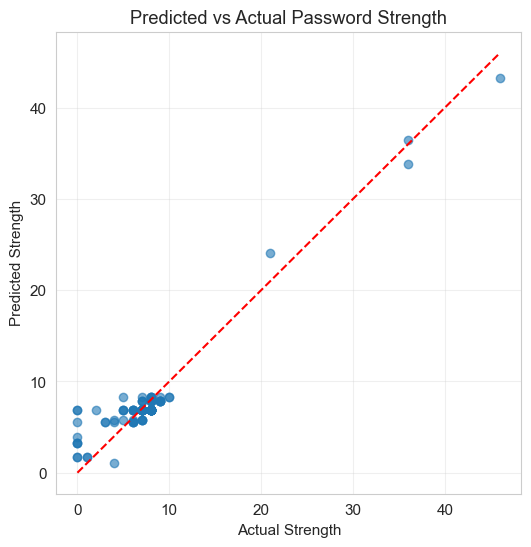

In [89]:
sns.barplot(x=model.feature_importances_, y=X.columns, orient='h', palette='viridis')
plt.title("Random Forest Feature Importance")
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Predicted vs Actual Password Strength")
plt.grid(True, alpha=0.3)
plt.show()